# **Iris의 종류 분류(Multiclass)**

이번에는 Class가 어려개인 데이터를 Logistic Regression으로 예측

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

*1.1 Data Load*


In [21]:
from sklearn.datasets import load_iris

iris = load_iris()

사용되는 변수는 암술과 수술

- sepal length(cm)
- sepal width(cm)
- petal length(cm)
- petal width(cm)

In [22]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

정답은 iris 꽃 종류

In [23]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
data, target = iris["data"], iris["target"]

In [25]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# 데이터 분포 확이

pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# 정답의 종류별 개수

pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

# 1.3 Data Split

데이터를 train과 test로 나눔

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size = 0.7, random_state=2021
)

In [29]:
print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


In [30]:
# Train 데이터의 정답 개수
pd.Series(train_target).value_counts()

2    38
1    34
0    33
dtype: int64

In [31]:
# Test 데이터의 정답 개수
pd.Series(test_target).value_counts()

0    17
1    16
2    12
dtype: int64

In [32]:
# 단순히 데이터를 분류할 경우, 데이터의 target 분포를 반영하지 못함
# srtatify를 사용하여 label을 넣어주면 원본 데이터의 정답 분포를 반영해 데이터 나눠줌

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.7, random_state = 2021, stratify=target)

In [33]:
pd.Series(train_target).value_counts()

0    35
2    35
1    35
dtype: int64

In [34]:
pd.Series(test_target).value_counts()

0    15
2    15
1    15
dtype: int64

# 2. Multiclass

시각화를 위해서 Sepal length와 Sepal width만 사용

In [35]:
X = train_data[:,:2] #???
X[0]

array([5.1, 3.3])

(1.5, 4.9)

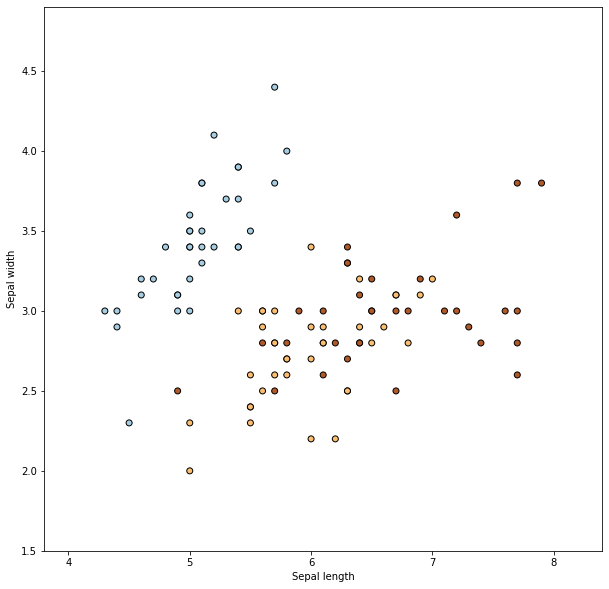

In [36]:
plt.figure(1, figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=train_target, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

2.1 One vs Rest

In [37]:
from sklearn.linear_model import LogisticRegression
ovr_logit = LogisticRegression(multi_class="ovr") #ovr >> one vs rest 옵션임
ovr_logit.fit(X, train_target)

LogisticRegression(multi_class='ovr')

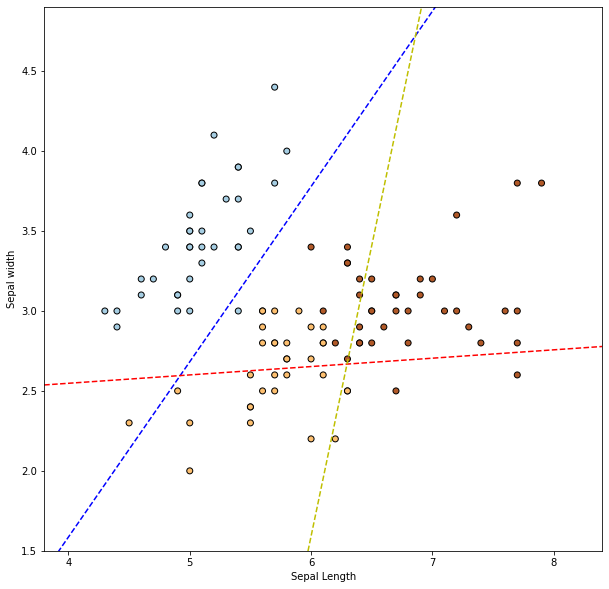

In [38]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5

plt.figure(1, figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
  def line(x0):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot([x_min, x_max], [line(x_min), line(x_max)],
           ls="--", color = color)
  
for i, color in zip(ovr_logit.classes_, "bry"):
  plot_hyperplane(i, color)
